In [1]:
import copy
import numpy as np

import itertools
from scipy import constants

from utils import build_symmetry_equivalent_configurations, find_sic, get_partition_function

import matplotlib.pyplot as plt

k_b = constants.physical_constants['Boltzmann constant in eV/K'][0]

# These containt the symmetry information for the 2x2 and 3x3 cells
atom_index_2 = np.loadtxt('data/atom_indices_8_no_pbc.csv', delimiter=",").astype(np.int64)
atom_index_3 = np.loadtxt('data/atom_indices_18_no_pbc.csv', delimiter=",").astype(np.int64)

## Find the symmetry independent configurations (SIC)

In [23]:
num_sites = 8
atom_indices = copy.deepcopy(atom_index_2)

#Generate all configurations - binary (you would use yours)
configurations = np.array(list(itertools.product([0, 1], repeat=num_sites)))

#Generate random energies (you would use yours)
energies = np.random.rand(len(configurations))

config_unique, unique_energies, multiplicity = find_sic(configurations,energies,atom_indices)
print('Len all config: %s. '%len(configurations),'Len SIC: %s.'%len(config_unique))

Len all config: 256.  Len SIC: 88.


## Boltzmann distribution

Text(0, 0.5, 'Probability')

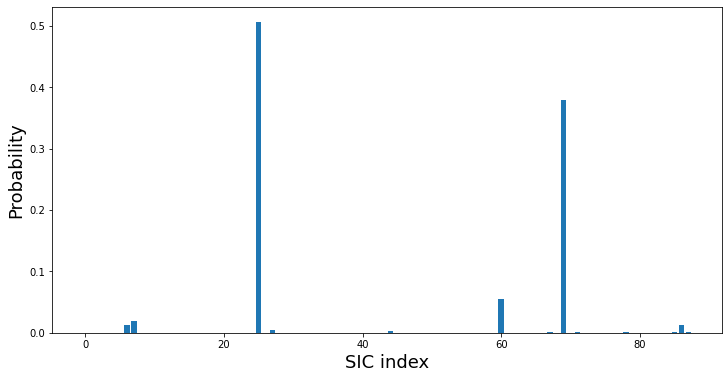

In [24]:
Z, p_i = get_partition_function(unique_energies, multiplicity, T=298.15, return_pi=True)

fig, axs = plt.subplots(1, 1, figsize = (12, 6))

axs.bar(np.arange(len(p_i)),p_i)

axs.set_xlabel('SIC index',fontsize=18)
axs.set_ylabel('Probability',fontsize=18)